아직 정리가 하나도 안 된 코드인데 일단은 공유합니다!    

### 이미지 확인하기
- 마스크 여부, 성별, 나이
- 전체 이미지를 살펴보면 든 생각
- 얼굴 부분만 crop
- 눈 위를 보고 성별과 나이 판단
- 눈 아래 코, 입을 보고 마스크 여부 판단

In [2]:
import os
import glob
from PIL import Image
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cv2.__version__

'4.5.5'

In [97]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')
eye_casecade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [98]:
path = './train/train/images/'
crop_path = './train/train/crop_images/'
person = os.listdir(path)

['./train/train/images/000009_female_Asian_56\\incorrect_mask.jpg', './train/train/images/000009_female_Asian_56\\mask1.jpg', './train/train/images/000009_female_Asian_56\\mask2.jpg', './train/train/images/000009_female_Asian_56\\mask3.jpg', './train/train/images/000009_female_Asian_56\\mask4.jpg', './train/train/images/000009_female_Asian_56\\mask5.jpg', './train/train/images/000009_female_Asian_56\\normal.jpg']
faces 1
faces 1
faces 1
faces 1
faces 1
faces 1
faces 1


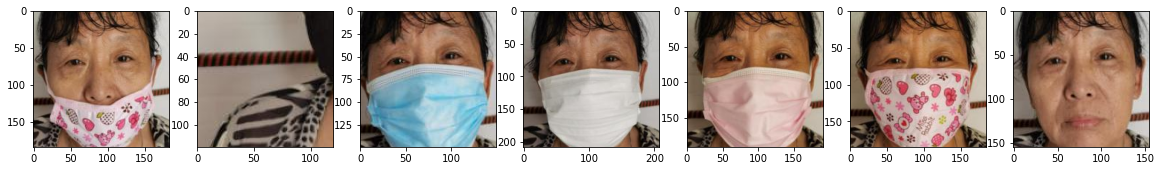

In [103]:
plt.figure(figsize=(20,100))
cnt = 0
for j, p in enumerate(person):
    if j == 7: # 3, 7
        images = glob.glob(os.path.join(path, p, '*.jpg'))
        print(images)
        no_face = 0
        no_faces = []
        temp_xywh = [0, 0, 0, 0]
        for i, image in enumerate(images):
            img = cv2.imread(image)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(
                    gray,
                    scaleFactor=1.01,
                    minNeighbors=5,
                    minSize=(100, 100)
            )
        
    
            print('faces', len(faces))
            if len(faces) == 0:
                print("얼굴 x")
                no_face += 1
                no_faces.append(i)
            elif len(faces) == 1:
                for (x, y, w, h) in faces:
                    cropped = img[y:y + h, x:x + w]
                    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
                    plt.subplot(10, 7, 7*j+i+1).imshow(cropped)
                    temp_xywh = [a + b for a,b in zip(temp_xywh, [x,y,w,h])]
            else: # 얼굴이 여러 개 인식된다면
                n_eyes = 0
                max_eyes_xywh = (0, 0, 0, 0)
                for (x, y, w, h) in faces:
                    roi_gray = gray[y:y+h, x:x+w]
                    roi_color = img[y:y+h, x:x+w]
                    eyes = eye_casecade.detectMultiScale(roi_gray, minSize=(35, 35))
                    print('eyes', len(eyes))
                    if len(eyes) > n_eyes:
                        n_eyes = len(eyes)
                        max_eyes_xywh = (x, y, w, h)
                x, y, w, h = max_eyes_xywh
                cropped = img[y:y + h, x:x + w] # 40, 20
                cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
                plt.subplot(10,7,7*j+i+1).imshow(cropped)
                temp_xywh = [a + b for a,b in zip(temp_xywh, [x,y,w,h])]

        # 평균 얼굴 위치
        m_x, m_y, m_w, m_h = [x // (7 - no_face) for x in temp_xywh]
        for i, image in enumerate(images):
            img = cv2.imread(image)
            if i in no_faces:
                cropped = img[m_y:m_y + m_h, m_x:m_x + m_w]
                cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
                plt.subplot(10, 7, 7*j+i+1).imshow(cropped)
    cnt += 1
    if cnt == 10:
        break

In [77]:
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [79]:
[406, 913, 1296, 1296] // 3

TypeError: unsupported operand type(s) for //: 'list' and 'int'

In [23]:
path = './train/train/images/000019_female_Asian_57'
images = glob.glob(os.path.join(path,'*.jpg'))
print(images)

['./train/train/images/000019_female_Asian_57\\incorrect_mask.jpg', './train/train/images/000019_female_Asian_57\\mask1.jpg', './train/train/images/000019_female_Asian_57\\mask2.jpg', './train/train/images/000019_female_Asian_57\\mask3.jpg', './train/train/images/000019_female_Asian_57\\mask4.jpg', './train/train/images/000019_female_Asian_57\\mask5.jpg', './train/train/images/000019_female_Asian_57\\normal.jpg']


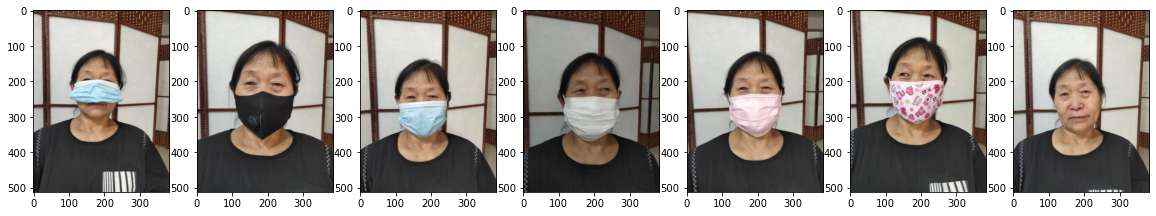

In [24]:
plt.figure(figsize=(20,100))

for i, image in enumerate(images):
    im = Image.open(image)
    plt.subplot(1,7,i+1).imshow(im)

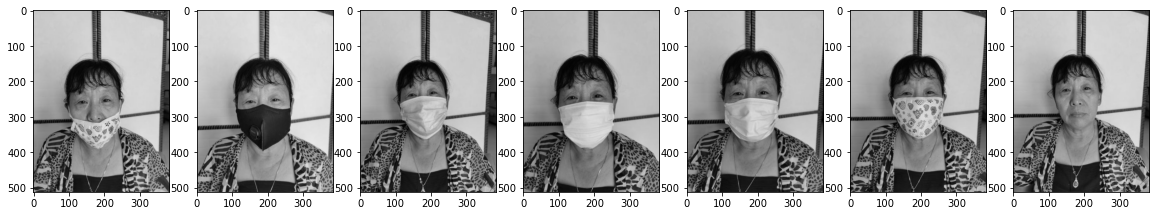

In [95]:
path = './train/train/images/000009_female_Asian_56'
images = glob.glob(os.path.join(path,'*.jpg'))
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    plt.subplot(1,7,i+1).imshow(img)

- 마스크의 종류 여러개
- 한 사람에 대해서 마스크를 제대로 쓴 5개, 잘못 쓴 1개, 안 쓴 1개 이미지

In [25]:
os.getcwd()

'C:\\Users\\omocomo\\Documents\\BoostCamp AI Tech\\수업자료&과제\\6~7주차'

In [28]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')
eye_casecade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [91]:
path = './train/train/images/000009_female_Asian_56'
images = glob.glob(os.path.join(path,'*.jpg'))
print(images)

['./train/train/images/000009_female_Asian_56\\incorrect_mask.jpg', './train/train/images/000009_female_Asian_56\\mask1.jpg', './train/train/images/000009_female_Asian_56\\mask2.jpg', './train/train/images/000009_female_Asian_56\\mask3.jpg', './train/train/images/000009_female_Asian_56\\mask4.jpg', './train/train/images/000009_female_Asian_56\\mask5.jpg', './train/train/images/000009_female_Asian_56\\normal.jpg']


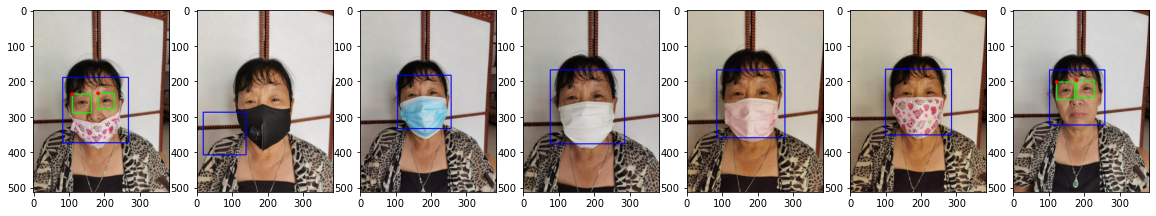

In [92]:
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(gray)

    faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.01,
            minNeighbors=5,
            minSize=(100, 100)
    )

    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_casecade.detectMultiScale(roi_gray, minSize=(35, 35))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh),(0, 255, 0), 2)
            cv2.line(roi_color, (ex, ey), (ex, ey), (0, 0, 255), 10)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1,7,i+1).imshow(img)
#     cv2.imshow('Image view', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

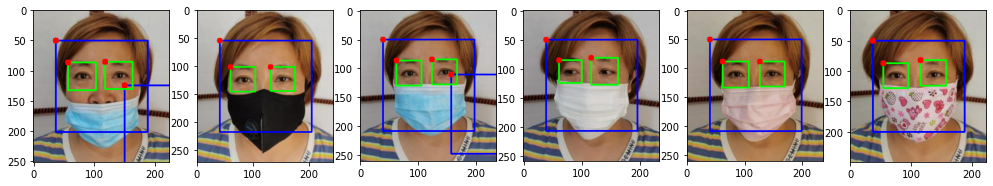

In [38]:
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    im = Image.open(image)
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(gray)

    faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.01,
            minNeighbors=5,
            minSize=(100, 100)
    )

    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_casecade.detectMultiScale(roi_gray, minSize=(35, 35))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh),(0, 255, 0), 2)
            cv2.line(roi_color, (ex, ey), (ex, ey), (0, 0, 255), 10)
        cv2.line(img, (x, y), (x, y), (0, 0, 255), 10)
#         cv2.line(img, (ex, ey), (ex, ey), (0, 0, 255), 10)
        area = (100, 100, 100, 100)
#         cropped_img = im.crop(area)
#         cropped_img.show()
#         break
#     break
    if len(eyes) != 0:
        cropped = img[y - int(h/3):y + h + int(h/3), x - int(w/4):x + w + int(w/4)]
            
        cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

        plt.subplot(1,7,i+1).imshow(cropped)
#     cv2.imshow('Image view', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

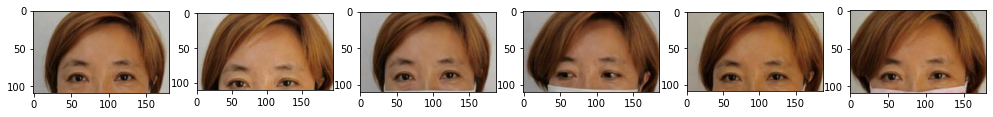

In [103]:
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    im = Image.open(image)
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(gray)

    faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.01,
            minNeighbors=5,
            minSize=(100, 100)
    )

    for (x,y,w,h) in faces:
#         cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_casecade.detectMultiScale(roi_gray, minSize=(35, 35))
#         for (ex, ey, ew, eh) in eyes:
#             cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh),(0, 255, 0), 2)
#             cv2.line(roi_color, (ex, ey), (ex, ey), (0, 0, 255), 10)
#         cv2.line(img, (x, y), (x, y), (0, 0, 255), 10)
#         cv2.line(img, (ex, ey), (ex, ey), (0, 0, 255), 10)
#         area = (100, 100, 100, 100)
#         cropped_img = im.crop(area)
#         cropped_img.show()
#         break
#     break
    if len(eyes) != 0:
        cropped = img[y - int(h/5):y + ex, x - int(w/10):x + w + int(w/10)]
            
        cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

        plt.subplot(1,7,i+1).imshow(cropped)
#     cv2.imshow('Image view', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

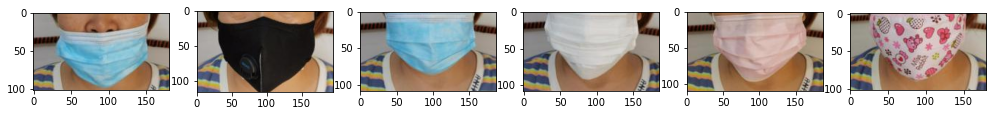

In [100]:
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    im = Image.open(image)
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(gray)

    faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.01,
            minNeighbors=5,
            minSize=(100, 100)
    )

    for (x,y,w,h) in faces:
#         cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_casecade.detectMultiScale(roi_gray, minSize=(35, 35))
#         for (ex, ey, ew, eh) in eyes:
#             cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh),(0, 255, 0), 2)
#             cv2.line(roi_color, (ex, ey), (ex, ey), (0, 0, 255), 10)
#         cv2.line(img, (x, y), (x, y), (0, 0, 255), 10)
#         cv2.line(img, (ex, ey), (ex, ey), (0, 0, 255), 10)
#         area = (100, 100, 100, 100)
#         cropped_img = im.crop(area)
#         cropped_img.show()
#         break
#     break
    if len(eyes) != 0:
        cropped = img[y + ex:y + h + int(h/5), x - int(w/10):x + w + int(w/10)]
            
        cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

        plt.subplot(1,7,i+1).imshow(cropped)
#     cv2.imshow('Image view', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

- 검정색 마스크를 썼을 때 얼굴 색이 밝게 나온다

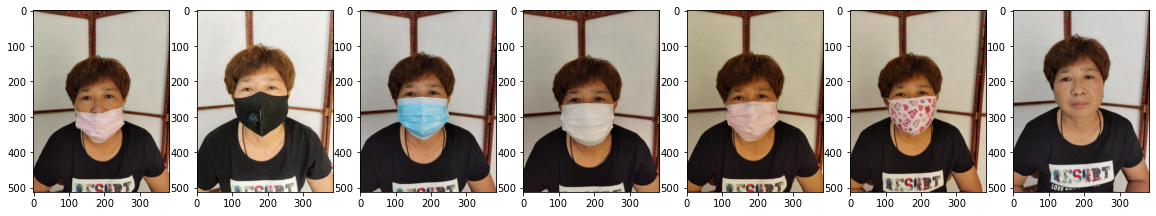

In [48]:
path = './train/train/images/000002_female_Asian_52'
images = glob.glob(os.path.join(path,'*.jpg'))
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    im = Image.open(image)
    plt.subplot(1,7,i+1).imshow(im)

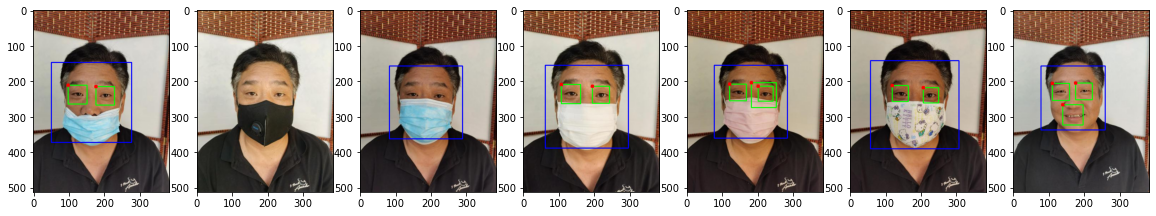

In [44]:
path = './train/train/images/000004_male_Asian_54'
images = glob.glob(os.path.join(path,'*.jpg'))
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    im = Image.open(image)
    
    
    im = Image.open(image)
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.01,
            minNeighbors=5,
            minSize=(100, 100)
    )

    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_casecade.detectMultiScale(roi_gray, minSize=(35, 35))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh),(0, 255, 0), 2)
            cv2.line(roi_color, (ex, ey), (ex, ey), (0, 0, 255), 10)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1,7,i+1).imshow(img)

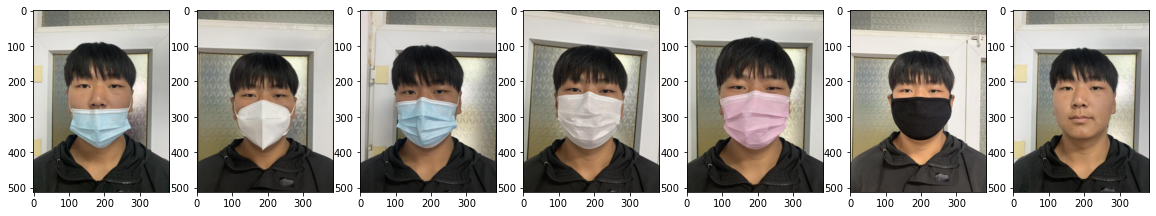

In [50]:
path = './train/train/images/006944_male_Asian_20'
images = glob.glob(os.path.join(path,'*.jpg'))
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    im = Image.open(image)
    plt.subplot(1,7,i+1).imshow(im)

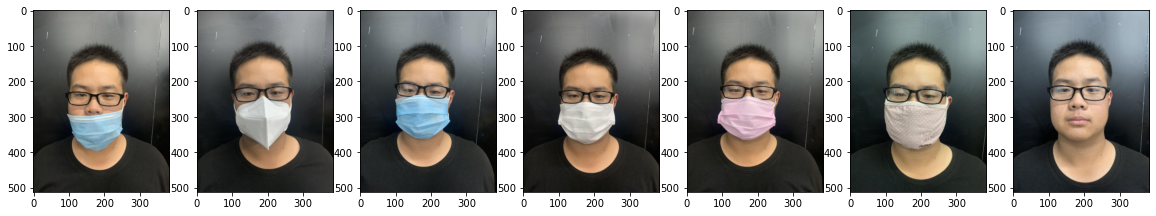

In [51]:
path = './train/train/images/006722_male_Asian_19'
images = glob.glob(os.path.join(path,'*.jpg'))
plt.figure(figsize=(20,100))
for i, image in enumerate(images):
    im = Image.open(image)
    plt.subplot(1,7,i+1).imshow(im)